# Generation of vector-Apodizing Phase Plate patterns

This tutorial introduces the basics of generatin vector-Apodizing Phase Plate patterns


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')
mpl.rcParams.update({'font.size': 22})
plt.rc('figure', figsize=(10.0, 10.0))


from hcipy import *


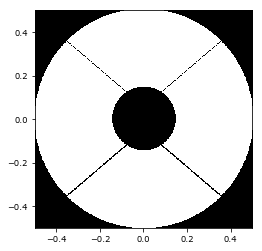

In [2]:
pupil_grid = make_pupil_grid(512)

aperture = make_magellan_aperture(True)

telescope_pupil = aperture(pupil_grid)

imshow_field(telescope_pupil, cmap='gray')
plt.show()


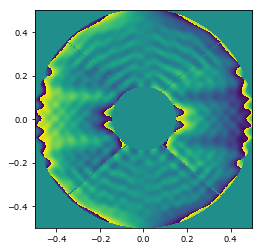

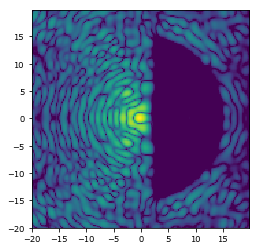

In [3]:
wavefront = Wavefront(telescope_pupil, 1)

focal_grid = make_focal_grid(4, 20)

prop = FraunhoferPropagator(pupil_grid, focal_grid)

num_iterations = 80

contrast_level = 1e-5


dark_zone = (circular_aperture(30)(focal_grid)).astype(bool)*(focal_grid.x>2)

contrast = focal_grid.ones()

contrast[dark_zone] = contrast_level

vAPP = generate_app_keller(wavefront, prop, contrast, num_iterations, beta = 1)

plt.figure()
imshow_field(vAPP.phase)

plt.figure()
imshow_field(np.log10(prop(vAPP).intensity/np.max(prop(vAPP).intensity)),vmin = -5)

plt.show()

In [4]:
focal_grid2 = make_focal_grid(4, 60)

prop2 = FraunhoferPropagator(pupil_grid, focal_grid2)

num_iterations = 80

contrast_level = 1e-5


dark_zone2 = (circular_aperture(30)(focal_grid2)).astype(bool)*(focal_grid2.x>2)

dark_zone2 += circular_aperture(10)(focal_grid2.shifted((0,20))).astype(bool)

dark_zone2 +=  (circular_aperture(30)(focal_grid2.shifted((0,40)))).astype(bool)*(focal_grid2.x<-2)


contrast = focal_grid2.ones()

contrast[dark_zone2] = contrast_level

vAPP = generate_app_keller(wavefront, prop2, contrast, num_iterations, beta = 1)

vAPP.electric_field *= np.exp(1j*pupil_grid.y*2*np.pi*20)*telescope_pupil




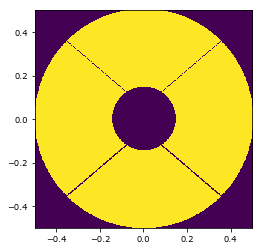

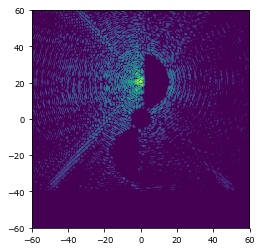

In [5]:
plt.figure()
imshow_field(vAPP.amplitude)

plt.figure()
imshow_field(np.log10(prop2(vAPP).intensity/np.max(prop2(vAPP).intensity)),vmin = -5)

#write_fits(vAPP.phase,'vAPP_phase_tutorial.fits.gz')
#write_fits(vAPP.amplitude,'vAPP_amplitude_tutorial.fits.gz')

plt.show()


